In [1]:
library(dplyr)
library(Seurat)
library(ggplot2)
library(future)
library(Cairo)
library(Matrix)
library(SeuratDisk)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



# read in seurat objects

In [2]:
seurat_r1 = readRDS('../for_2022_scdata/7.mark_doublet.seurat_obj.rds')
seurat_r2 = readRDS('../for_2023_scdata/7.mark_doublet.seurat_obj.rds')

obj_lst = list(
    midgut_r1 = seurat_r1,
    midgut_r2 = seurat_r2
)

# integrate seurat objects

In [3]:
# select features that are repeatedly variable across datasets for integration
features <- SelectIntegrationFeatures(object.list = obj_lst)
midgut.anchors <- FindIntegrationAnchors(object.list = obj_lst, anchor.features = features)
# this command creates an 'integrated' data assay
seurat_mobj <- IntegrateData(anchorset = midgut.anchors)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9934 anchors

Filtering anchors

	Retained 3419 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [4]:
# save seurat_obj
opath_seurat_obj = '1.merged.seurat_obj.rds'
saveRDS(seurat_mobj, file = opath_seurat_obj)

# preprocessing data

In [5]:
## preprocessing data 
opath_seurat_mobj = '2.QC.seurat_obj.rds'
# # do normalization
# seurat_mobj <- NormalizeData(seurat_mobj, normalization.method = "LogNormalize", scale.factor = 10000)

# # feature selection
# # Identification of highly variable features
# seurat_mobj <- FindVariableFeatures(seurat_mobj, selection.method = "vst", nfeatures = 2000)
# # Identify the 10 most highly variable genes
# top10 <- head(VariableFeatures(seurat_mobj), 10)
# # plot variable features with and without labels
# plot1 <- VariableFeaturePlot(seurat_mobj)
# plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
# # save plot2
# ggsave(opath_dotplot_hvg, plot2)
# plot2

# scaling data
all.genes <- rownames(seurat_mobj)
seurat_mobj <- ScaleData(seurat_mobj, features = all.genes)

# save seurat_obj after filtering
saveRDS(seurat_mobj, file = opath_seurat_mobj)

Centering and scaling data matrix



# dimensional reduction

PC_ 1 
Positive:  AAEL025552, AAEL008078, AAEL019986, AAEL013723, AAEL022285, AAEL019599, AAEL017012, AAEL012751, AAEL019553, AAEL007682 
	   AAEL019824, AAEL018219, AAEL019473, AAEL004319, AAEL025097, AAEL011953, AAEL011359, AAEL019596, AAEL009114, AAEL002761 
	   AAEL009294, AAEL019682, AAEL012539, AAEL019626, AAEL018320, AAEL021365, AAEL020002, AAEL003731, AAEL019499, AAEL019672 
Negative:  AAEL003060, AAEL004798, AAEL014516, AAEL013623, AAEL026466, AAEL013885, AAEL022570, AAEL006425, AAEL009760, AAEL008769 
	   AAEL000668, AAEL008784, AAEL010782, AAEL003317, AAEL023729, AAEL001690, AAEL022334, AAEL009244, AAEL015136, AAEL002263 
	   AAEL000311, AAEL013774, AAEL008428, AAEL010196, AAEL000500, AAEL002661, AAEL021105, AAEL007591, AAEL007601, AAEL025367 
PC_ 2 
Positive:  AAEL008789, AAEL008658, AAEL026403, AAEL028021, AAEL001061, AAEL000549, AAEL014583, AAEL022140, AAEL012635, AAEL003530 
	   AAEL002832, AAEL002527, AAEL012964, AAEL011293, AAEL003723, AAEL004059, AAEL007778, AAEL00480

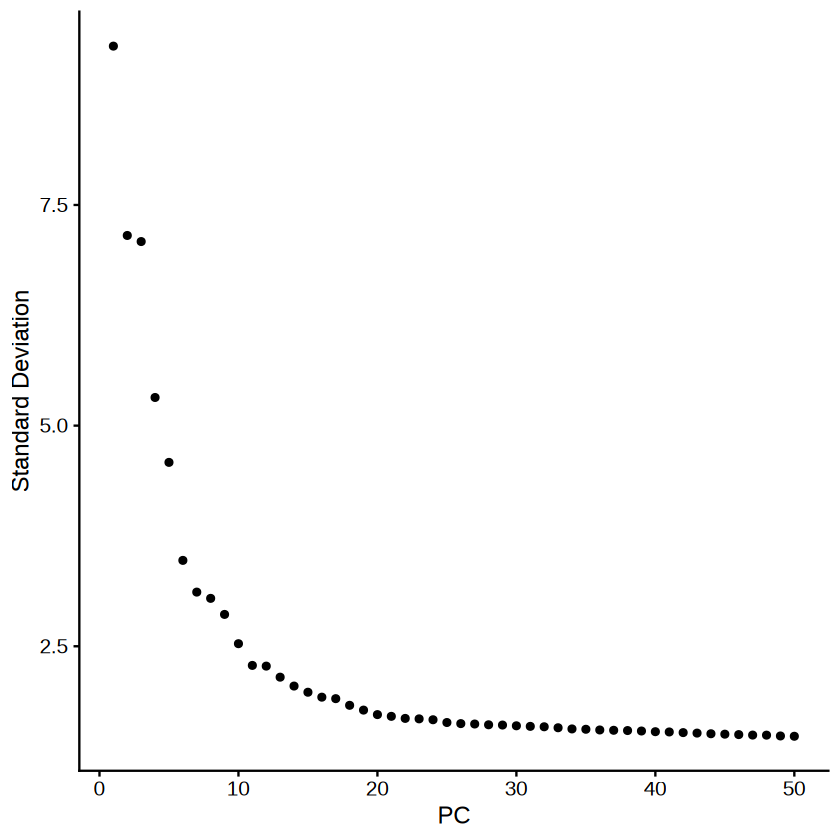

In [6]:
# dimensional reduction and cluster cells 

# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './2.QC.seurat_obj.rds'
# number of PCs to plot
num_PCs = 60
# path to save DimHeatmap (pdf) of PCA
opath_dimheatmap = '3.PCA.DimHeatmap.1-20.pdf'
opath_dimheatmap = '3.PCA.DimHeatmap.21-40.pdf'
# path to save ElbowPlot (pdf) of PCA
opath_elbowPlot = '3.PCA.ElbowPlot.pdf'
# path to save seurat_obj
opath_seurat_obj = '3.PCA.seurat_obj.rds'

# read in seurat_obj
seurat_obj = readRDS(ipath_seurat_obj)
# PCA reduce dimension
seurat_obj <- RunPCA(seurat_obj, features = VariableFeatures(object = seurat_obj))
# plot DimHeatmap of PCA
# p1.1 = DimHeatmap(seurat_obj, dims = 1:30, balanced = TRUE)
# ggsave(opath_dimheatmap, p1.1)
# p1.1
# p1.2 = DimHeatmap(seurat_obj, dims = 31:num_PCs, balanced = TRUE)
# ggsave(opath_dimheatmap, p1.2)
# p1.2
# Plots the standard deviations of PCA
p2 = ElbowPlot(seurat_obj, ndims = num_PCs)
ggsave(opath_elbowPlot, p2)
p2
# save seurat_obj
saveRDS(seurat_obj, file = opath_seurat_obj)

# cluster

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7445
Number of edges: 314785

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8411
Number of communities: 13
Elapsed time: 1 seconds


14:01:33 UMAP embedding parameters a = 0.9922 b = 1.112

14:01:33 Read 7445 rows and found 25 numeric columns

14:01:33 Using Annoy for neighbor search, n_neighbors = 30

14:01:33 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:01:34 Writing NN index file to temp file /tmp/Rtmp0WYmvv/file7ecf7665cf31

14:01:34 Searching Annoy index using 1 thread, search_k = 3000

14:01:37 Annoy recall = 100%

14:01:38 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:01:39 Initializing from normalized Laplacian + noise (using irlba)

14:01:41 Commencing optimization for 500 epochs, with 350508 positive edges

14:02:16 Optimization finished

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


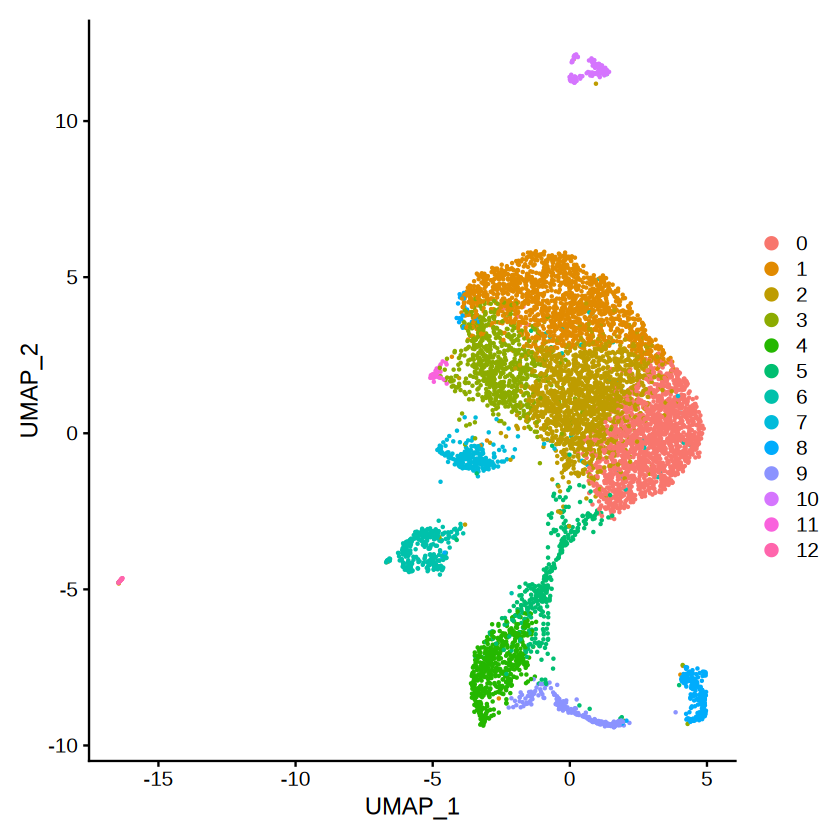

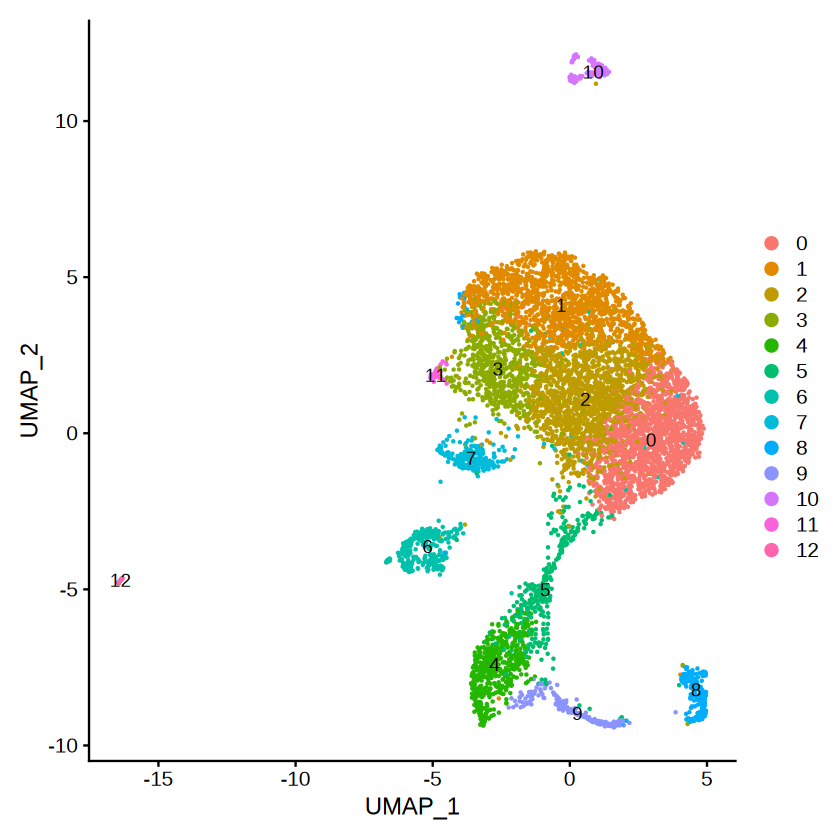

In [25]:
# dimensional reduction and cluster cells 

# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './3.PCA.seurat_obj.rds'
# number of PCs to plot
num_PCs = 25
# resolution  between 0.4-1.2 typically returns good results 
resolution = 0.5
# path to save DimHeatmap (pdf) of PCA
opath_DimPlot = '4.cluster.Dimplot.pdf'
# path to save DimHeatmap (pdf) of PCA
opath_DimPlot_labeled = '4.cluster.Dimplot.labeled.pdf'
# path to save seurat_obj
opath_seurat_obj = '4.cluster.seurat_obj.rds'

# read in seurat_obj
seurat_obj = readRDS(ipath_seurat_obj)
# construct a KNN graph based on PCA
seurat_obj <- FindNeighbors(seurat_obj, dims = 1:num_PCs)
# refine the edge weights between any two cells based on the shared overlap in their local neighborhoods (Jaccard similarity)
seurat_obj <- FindClusters(seurat_obj, resolution = resolution)
# UMAP to cluster
seurat_obj <- RunUMAP(seurat_obj, dims = 1:num_PCs)
# plot
p = DimPlot(seurat_obj, reduction = "umap")
ggsave(opath_DimPlot, p)
p
# plot with label
p = DimPlot(seurat_obj, reduction = "umap", label = TRUE)
ggsave(opath_DimPlot_labeled, p)
p
# save seurat_obj
saveRDS(seurat_obj, file = opath_seurat_obj)

In [26]:
# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './4.cluster.seurat_obj.rds'
# path to save seurat_obj
opath_seurat_obj = '5.marker.seurat_obj.rds'
# path to save marker genes
opath_marker_genes = '5.marker.genes.csv'

# read in seurat_obj
seurat_obj = readRDS(ipath_seurat_obj)
# find markers for every cluster compared to all remaining cells, report only the positive ones
seurat_obj.markers <- FindAllMarkers(seurat_obj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
# save marker genes
write.csv(seurat_obj.markers, opath_marker_genes)
# save seurat_obj
saveRDS(seurat_obj, file = opath_seurat_obj)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12



# plot DoHeatmap

png 
  2

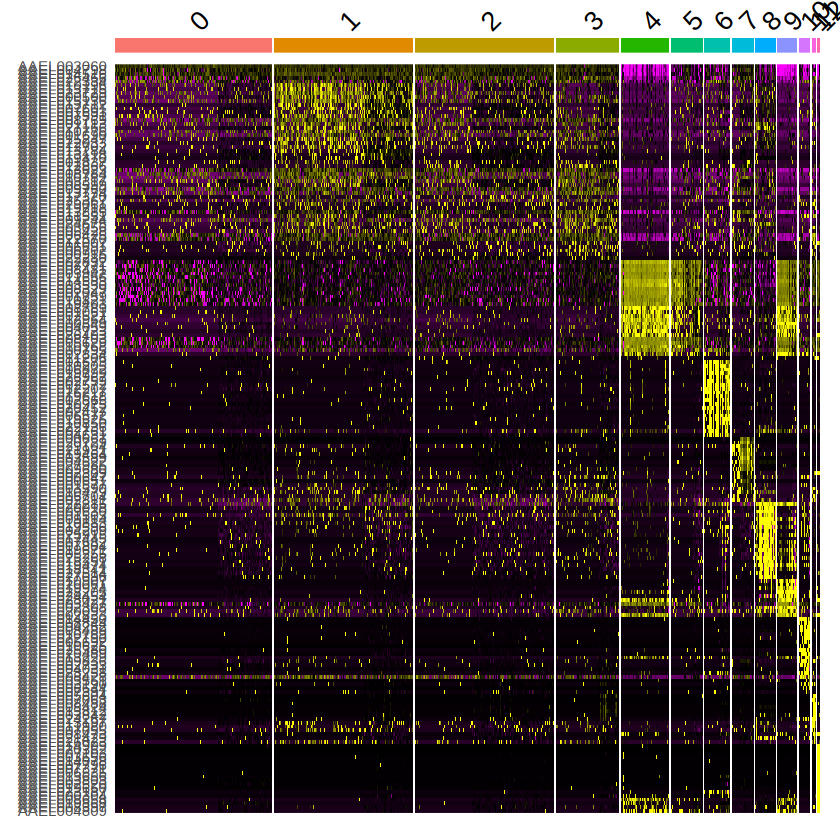

In [27]:
# path to read marker genes
ipath_marker_genes = '5.marker.genes.csv'
# path to read seurat_obj
ipath_seurat_obj = '5.marker.seurat_obj.rds'
# path to save DoHeatmap (pdf) of PCA
opath_DoPlot = '6.cluster.Doplot.pdf'

seurat_obj = readRDS(ipath_seurat_obj)
seurat_obj.markers = read.csv(ipath_marker_genes)

seurat_obj.markers %>%
    group_by(cluster) %>%
    top_n(n = 20, wt = avg_log2FC) -> topnG
p = DoHeatmap(seurat_obj, features = topnG$gene) + NoLegend()
cairo_pdf(opath_DoPlot, width=12, height=7)
plot(p)
dev.off()
p

# output

In [28]:
# path to read seurat_obj
ipath_seurat_obj = '5.marker.seurat_obj.rds'
seurat_obj = readRDS(ipath_seurat_obj)

In [29]:
# write out meta.data
opath_meta_data = '7.meta_data.csv'
write.csv(seurat_obj@meta.data, opath_meta_data)

In [30]:
# write out umap pos
opath_umap_pos = '7.umap_pos.csv'
write.csv(seurat_obj[["umap"]]@cell.embeddings, opath_umap_pos)

In [31]:
# write out reads count as a mtx
opath_rdc_mtx = '7.rd_count.mtx'
writeMM(Matrix(seurat_obj@assays$RNA@counts, sparse = T), opath_rdc_mtx)

NULL

In [35]:
# write h5ad file
SaveH5Seurat(seurat_obj, filename = "7.seurat_obj.h5Seurat")
Convert("7.seurat_obj.h5Seurat", dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900



Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding data for integrated

Adding scale.data for integrated

Adding variable features for integrated

No feature-level metadata found for integrated

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Validating h5Seurat file

Adding scale.data from integrated as X

Adding data from integrated as raw

Transfering meta.data to obs

Adding dimensional reduction information for pca

Adding feature loadings for pca

Adding dimensional reduction information for umap

Adding integrated_snn as neighbors

